# KMeans: Find K (Core)


### Intructions


### **Task**

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data [here](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this [data source](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means).

1. Use KMeans to create various customer segments.
   1. Use an Elbow Plot of inertia.
   2. And a plot of Silhouette Scores.
   3. Choose a K based on the results.
2. Submit your notebook below.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading CSV file into pandas dataframe
df = pd.read_csv('cust_seg.csv')
# Storing specified columns into cust
cust = df[['Age', 'Edu', 'Years Employed', 'Income', 'Other Debt', 'Defaulted', 'Card Debt', 'DebtIncomeRatio']]
cust.head()

,Age,Edu,Years Employed,Income,Other Debt,Defaulted,Card Debt,DebtIncomeRatio
0,41,2,6,19,1.073,0.0,0.124,6.3
1,47,1,26,100,8.218,0.0,4.582,12.8
2,33,2,10,57,5.802,1.0,6.111,20.9
3,29,2,4,19,0.516,0.0,0.681,6.3
4,47,1,31,253,8.908,0.0,9.308,7.2


In [3]:
# Checking data set using .info() results
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Other Debt       850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   Card Debt        850 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


Looking at the results, it is clear to see that column `'Defaulted'` has NAN values.

Now I will impute the missing values with the columns mean. The reasoning being over 5% as a rule of thumb, the data with missing values shouldn't be dropped.

In [4]:
cust['Defaulted'].fillna(cust['Defaulted'].mean(), inplace=True)
cust.isna().sum()

/tmp/ipykernel_8353/3590452929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['Defaulted'].fillna(cust['Defaulted'].mean(), inplace=True)


Age                0
Edu                0
Years Employed     0
Income             0
Other Debt         0
Defaulted          0
Card Debt          0
DebtIncomeRatio    0
dtype: int64

### KMeans Clustering

I will start by creating a Standard Scaler and transforming it onto the cust dataframe.

In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cust)

The next step is the create 2 for loops that iterate through `n_clusters` and plots the results of Inertias and Silhouette Scores.

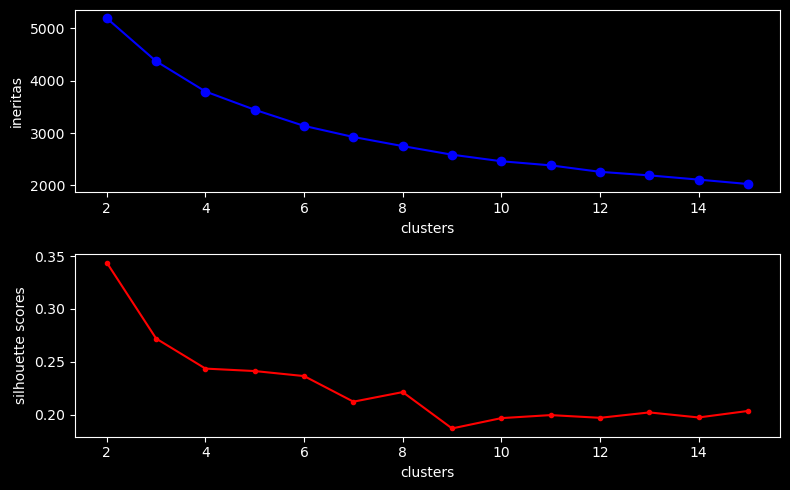

In [6]:
# Creating lists of inertias and silhouette scores
inertias = []
silhouette_scores = []

# Creating for loop
for k in range(2, 16):
    # Creating model and setting n_cluster to k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fitting model the Standrad Scaler
    kmeans.fit(scaled_df)
    # Appending results to inertias list
    inertias.append(kmeans.inertia_)
    
# Creating for loop
for s in range(2,16):
    # Creating model and setting n_cluster to k
    kmeans = KMeans(n_clusters=s, random_state=42)
    # Fitting model the Standrad Scaler
    kmeans.fit(scaled_df)
    # Appending results to silhouette_score list
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Setting style for plots
with plt.style.context(['seaborn-muted', 'dark_background']):
    # Creating subplots and setting figure size
    fig, ax = plt.subplots(2, 1, figsize=(8,5))
    # Plotting inertias
    ax[0].plot(range(2, 16), inertias, marker='o', c='b')
    ax[0].set_xlabel('clusters')
    ax[0].set_ylabel('ineritas')
    # Plotting silhouette_score
    ax[1].plot(range(2,16), silhouette_scores, marker='.', c='r')
    ax[1].set_xlabel('clusters')
    ax[1].set_ylabel('silhouette scores')
plt.tight_layout()
plt.show()
    

From the results above I would definitely recommend using 2 n_clusters for this model. However, I wouldn't use this in the real world with the score being so low, `0.35`. This would preform badly and probably have major consequences depending on the situation.

In [7]:
# Refitting KMeans with 2 clusters from results
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_df)
# Adding the clusters as a column in the data frame
cust['cluster'] = kmeans.labels_
cust.head()

/tmp/ipykernel_8353/1415481034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust['cluster'] = kmeans.labels_


,Age,Edu,Years Employed,Income,Other Debt,Defaulted,Card Debt,DebtIncomeRatio,cluster
0,41,2,6,19,1.073,0.0,0.124,6.3,0
1,47,1,26,100,8.218,0.0,4.582,12.8,1
2,33,2,10,57,5.802,1.0,6.111,20.9,1
3,29,2,4,19,0.516,0.0,0.681,6.3,0
4,47,1,31,253,8.908,0.0,9.308,7.2,1


In [8]:
# Grouping dataframe and aggregating by mean values
clusters_group = cust.groupby('cluster', as_index=False).mean()
clusters_group 

,cluster,Age,Edu,Years Employed,Income,Other Debt,Defaulted,Card Debt,DebtIncomeRatio
0,0,33.054896,1.646884,6.557864,33.942136,1.91762,0.261611,0.940387,9.118694
1,1,42.590909,1.954545,16.255682,95.437500,7.52546,0.260731,4.014068,14.203977


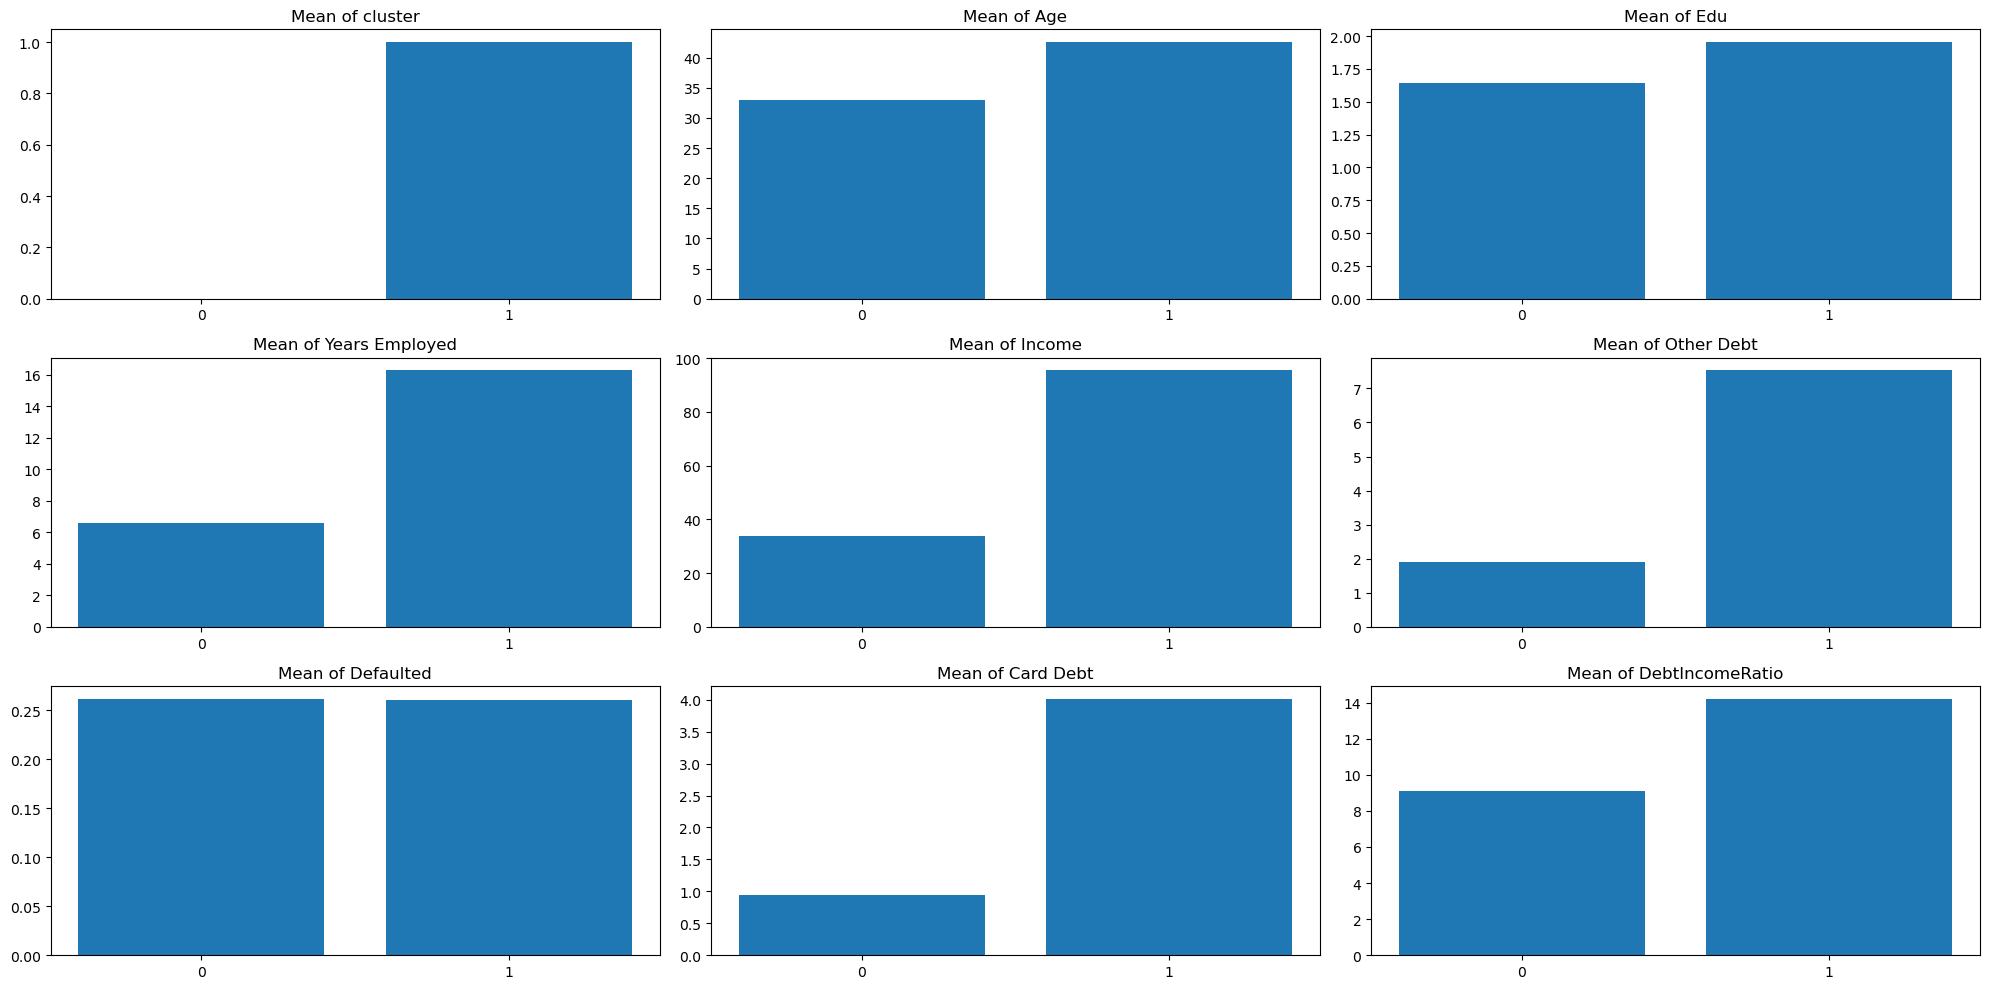

In [9]:
fig, ax = plt.subplots(3,3, figsize=(20,10))

ax = ax.ravel()

for i, col in enumerate(clusters_group[1:]):
    ax[i].bar(clusters_group['cluster'], clusters_group[col], tick_label=clusters_group['cluster'])
    ax[i].set_title(f'Mean of {col}')
plt.tight_layout()
plt.show()


## Cluster 1 & 2:

Cluster 1 age of customers is younger than the average age of customers in cluster 2. With this in mind, this would explain why younger customers would be less educated than older customers in cluster 2. This would also explain why cluster 2 customers would have less years of work experience than cluster 1 customers. However, cluster 2 customers have more accumulated debt than cluster 1 customers. Also, note that cluster 2 customers having more debt, cluster 2 customres also have a higher income than cluster 1 customers. Note, cluster 1 customers have a lower debt income ratio than cluster 2 customers. This would explain cluster 1 customers decreased income.

I would recommend by this analysis that cluster 2 would be my choice base off these results. 